In [38]:
import pandas as pd
import matplotlib.pyplot as plt
#import lightgbm
#from lightgbm import LGBMClassifier

import warnings

import seaborn as sns

In [2]:
invoice_train = pd.read_csv(f'data/invoice_train.csv', low_memory=False)

In [72]:
# Select a random row
random_row = invoice_train.sample(n=1)

# Transpose the row
transposed_row = random_row.transpose().reset_index()

# Rename the columns
transposed_row.columns = ['Column_Name', 'Value']

print(transposed_row)

             Column_Name               Value
0              client_id  train_Client_71099
1           invoice_date          2012-04-13
2             tarif_type                  10
3         counter_number              602159
4         counter_statue                   0
5           counter_code                 202
6       reading_remarque                   6
7    counter_coefficient                   1
8   consommation_level_1                 200
9   consommation_level_2                  83
10  consommation_level_3                   0
11  consommation_level_4                   0
12             old_index                7759
13             new_index                8042
14         months_number                   4
15          counter_type                ELEC
16      index_difference                -283
17       consumption_sum                 283


In [21]:
invoice_train['tarif_type'].unique()

array([11, 40, 15, 10, 12, 14, 13, 45, 29,  9, 30,  8, 21, 42, 27, 18, 24],
      dtype=int64)

In [24]:
invoice_train.groupby('counter_type')['tarif_type'].unique().reset_index()

,counter_type,tarif_type
0,ELEC,"[11, 15, 10, 12, 14, 13, 29, 9, 8, 21, 27, 18,..."
1,GAZ,"[40, 45, 30, 42]"


In [ ]:
#Gaz Tarifs : 30, 40, 42, 45
#Elect tarifs: 8, 9, 10, 11, 12, 13, 14, 15, 18, 21, 24, 27, 29, 

In [31]:
# To assess the relationship between the categorical variable tarif_type and the numerical variables consommation_level_1, consommation_level_2, consommation_level_3, and consommation_level_4, you can perform an Analysis of Variance (ANOVA) test. ANOVA evaluates whether there are statistically significant differences in the means of a numerical variable across the categories of a categorical variable, indicating a potential correlation between them.

from scipy.stats import f_oneway

# Grouping 'consommation_level_1' by 'tarif_type'
groups_1 = [group['consommation_level_1'].values for name, group in invoice_train.groupby('tarif_type')]

# ANOVA for 'consommation_level_1'
anova_result_1 = f_oneway(*groups_1)
print(f"P-value for consommation_level_1: {anova_result_1.pvalue}")



P-value for consommation_level_1: 0.0


In [ ]:
# If the p-value is less than 0.05, you can reject the null hypothesis, suggesting a significant correlation between tarif_type and consommation_level_1

In [ ]:
# Grouping 'consommation_level_2' by 'tarif_type'
groups_2 = [group['consommation_level_2'].values for name, group in invoice_train.groupby('tarif_type')]
# ANOVA for 'consommation_level_2'
anova_result_2 = f_oneway(*groups_2)
print(f"P-value for consommation_level_2: {anova_result_2.pvalue}")



P-value for consommation_level_2: 0.0


In [35]:
# Grouping 'consommation_level_3' by 'tarif_type'
groups_3 = [group['consommation_level_3'].values for name, group in invoice_train.groupby('tarif_type')]
# ANOVA for 'consommation_level_3'
anova_result_3 = f_oneway(*groups_3)
print(f"P-value for consommation_level_3: {anova_result_3.pvalue}")

P-value for consommation_level_3: 0.0


In [36]:
# Grouping 'consommation_level_4' by 'tarif_type'
groups_4 = [group['consommation_level_4'].values for name, group in invoice_train.groupby('tarif_type')]
# ANOVA for 'consommation_level_4'
anova_result_4 = f_oneway(*groups_4)
print(f"P-value for consommation_level_2: {anova_result_4.pvalue}")

P-value for consommation_level_2: 0.0


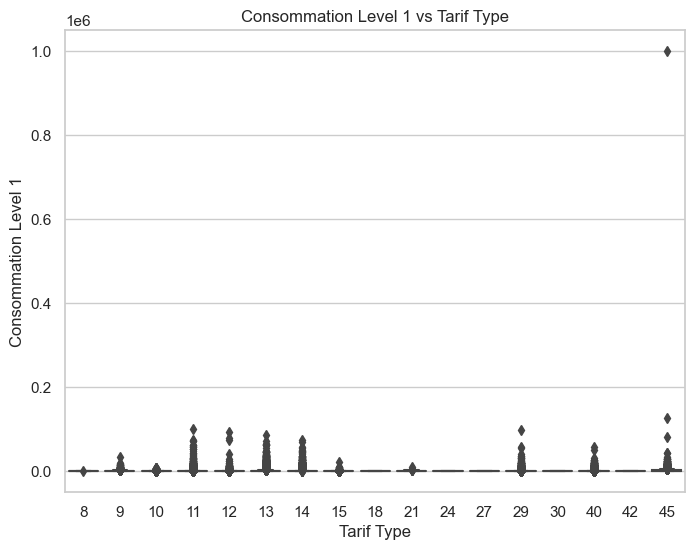

In [40]:
sns.set(style="whitegrid")

# Box plot for consommation_level_1
plt.figure(figsize=(8, 6))
sns.boxplot(x='tarif_type', y='consommation_level_1', data=invoice_train)
plt.title('Consommation Level 1 vs Tarif Type')
plt.xlabel('Tarif Type')
plt.ylabel('Consommation Level 1')
plt.show()


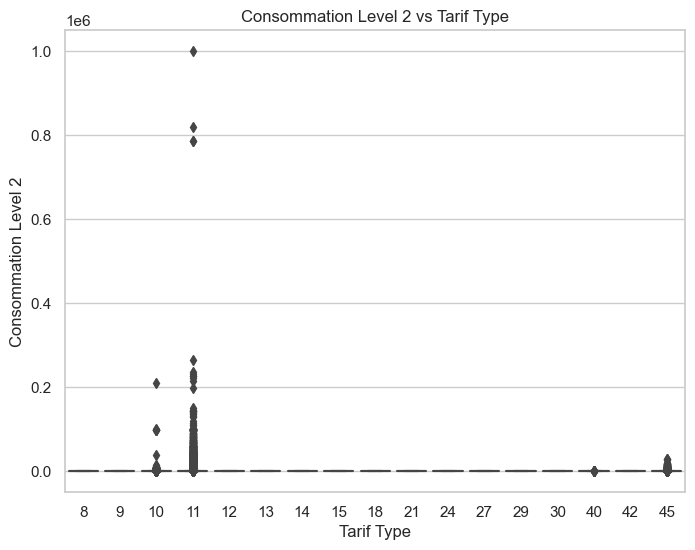

In [42]:
# Box plot for consommation_level_2
plt.figure(figsize=(8, 6))
sns.boxplot(x='tarif_type', y='consommation_level_2', data=invoice_train)
plt.title('Consommation Level 2 vs Tarif Type')
plt.xlabel('Tarif Type')
plt.ylabel('Consommation Level 2')
plt.show()


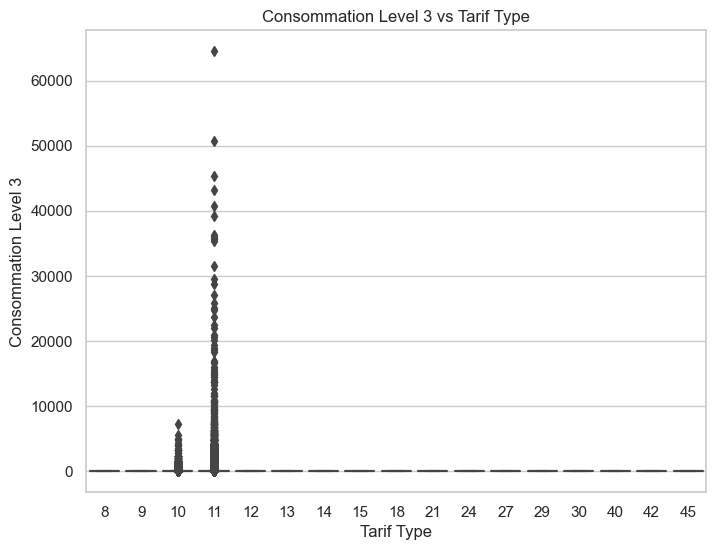

In [43]:
# Box plot for consommation_level_3
plt.figure(figsize=(8, 6))
sns.boxplot(x='tarif_type', y='consommation_level_3', data=invoice_train)
plt.title('Consommation Level 3 vs Tarif Type')
plt.xlabel('Tarif Type')
plt.ylabel('Consommation Level 3')
plt.show()


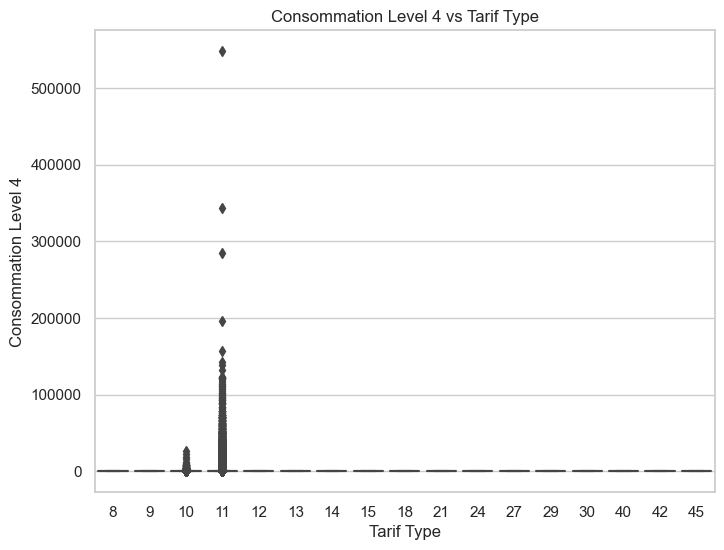

In [46]:
# Box plot for consommation_level_4
plt.figure(figsize=(8, 6))
sns.boxplot(x='tarif_type', y='consommation_level_4', data=invoice_train)
plt.title('Consommation Level 4 vs Tarif Type')
plt.xlabel('Tarif Type')
plt.ylabel('Consommation Level 4')
plt.show()


In [50]:
result = invoice_train.groupby('tarif_type').agg({
    'consommation_level_1': ['min', 'max'],
    'consommation_level_2': ['min', 'max'],
    'consommation_level_3': ['min', 'max'],
    'consommation_level_4': ['min', 'max']
}).reset_index()


In [51]:
print(result)

   tarif_type consommation_level_1         consommation_level_2           
                               min     max                  min     max   
0           8                    0     478                    0       0  \
1           9                    0   35070                    0       0   
2          10                    0    8000                    0  209952   
3          11                    0   99920                    0  999073   
4          12                    0   93385                    0       0   
5          13                    0   85366                    0       0   
6          14                    0   74971                    0       0   
7          15                    0   23178                    0       0   
8          18                    0     391                    0       0   
9          21                    0    9340                    0       0   
10         24                    0       0                    0       0   
11         27            

In [74]:
invoice_train['index_difference'] = invoice_train['new_index'] - invoice_train['old_index']

In [75]:
invoice_train['consumption_sum'] = invoice_train[['consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4']].sum(axis=1)


In [76]:
discrepancy_count = (invoice_train['index_difference'] != invoice_train['consumption_sum']).sum()
print(f'Number of rows with discrepancies: {discrepancy_count}')


Number of rows with discrepancies: 18935


In [77]:
len(invoice_train.index)

4476749

In [93]:
# Select a random row
random_row = invoice_train.sample(n=1)

# Transpose the row
transposed_row = random_row.transpose().reset_index()

# Rename the columns
transposed_row.columns = ['Column_Name', 'Value']

print(transposed_row)

             Column_Name              Value
0              client_id  train_Client_5570
1           invoice_date         2006-01-12
2             tarif_type                 11
3         counter_number             550078
4         counter_statue                  0
5           counter_code                407
6       reading_remarque                  6
7    counter_coefficient                  1
8   consommation_level_1                559
9   consommation_level_2                  0
10  consommation_level_3                  0
11  consommation_level_4                  0
12             old_index              70228
13             new_index              70787
14         months_number                  4
15          counter_type               ELEC
16      index_difference                559
17       consumption_sum                559


In [95]:
average_consumption_sum = invoice_train['consumption_sum'].mean()
print(f'The average consumption sum is {average_consumption_sum}')


The average consumption sum is 593.5340569685725


In [96]:


# Average Coinsumtion by tariff type
average_consumption_by_tarif = invoice_train.groupby('tarif_type')['consumption_sum'].mean().reset_index()
average_consumption_by_tarif.rename(columns={'consumption_sum': 'average_consumption_sum'}, inplace=True)

print(average_consumption_by_tarif)


    tarif_type  average_consumption_sum
0            8                11.116279
1            9               924.537672
2           10               495.645350
3           11               816.691929
4           12               257.190216
5           13              1586.798730
6           14              1009.307553
7           15                99.549419
8           18               197.250000
9           21               906.461538
10          24                 0.000000
11          27                 0.000000
12          29               723.478097
13          30               124.200000
14          40               174.587369
15          42                 0.000000
16          45              2128.413514


In [97]:

# Assuming 'df' is your DataFrame
min_values = invoice_train[['old_index', 'new_index']].min()
max_values = invoice_train[['old_index', 'new_index']].max()

print("Minimum values: old index, new index")
print(min_values)
print("\nMaximum values:old index new index")
print(max_values)


Minimum values: old index, new index
old_index    0
new_index    0
dtype: int64

Maximum values:old index new index
old_index    2800280
new_index    2870972
dtype: int64


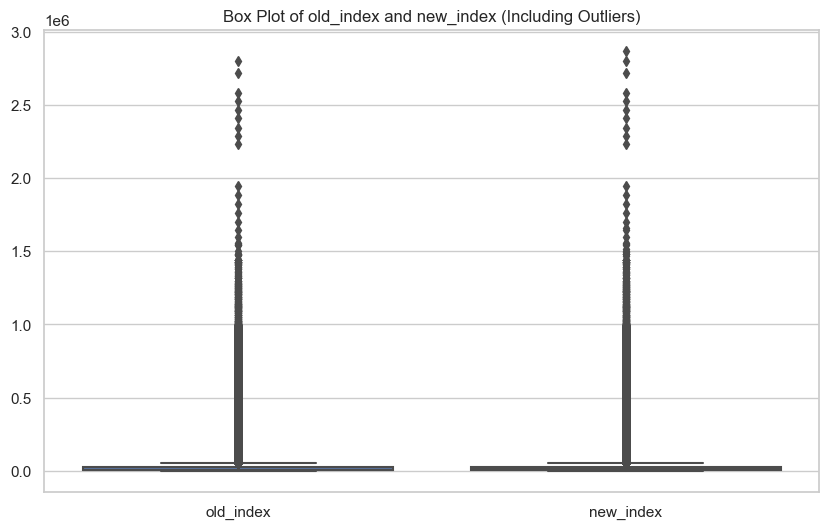

In [98]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(data=invoice_train[['old_index', 'new_index']])
plt.title('Box Plot of old_index and new_index (Including Outliers)')
plt.show()

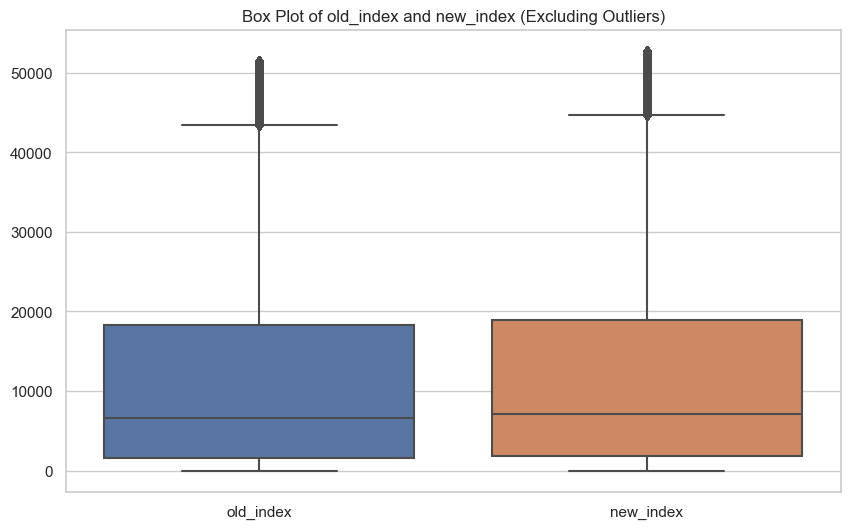

In [99]:
# Calculate the IQR for each column
Q1 = invoice_train[['old_index', 'new_index']].quantile(0.25)
Q3 = invoice_train[['old_index', 'new_index']].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_no_outliers = invoice_train[((invoice_train[['old_index', 'new_index']] >= (Q1 - 1.5 * IQR)) & (invoice_train[['old_index', 'new_index']] <= (Q3 + 1.5 * IQR))).all(axis=1)]

# Plot box plots without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers[['old_index', 'new_index']])
plt.title('Box Plot of old_index and new_index (Excluding Outliers)')
plt.show()


In [100]:
#trying to work with idea of the counter reset, I tried to find tthe counter reset but there is no clear number in the box plot above 

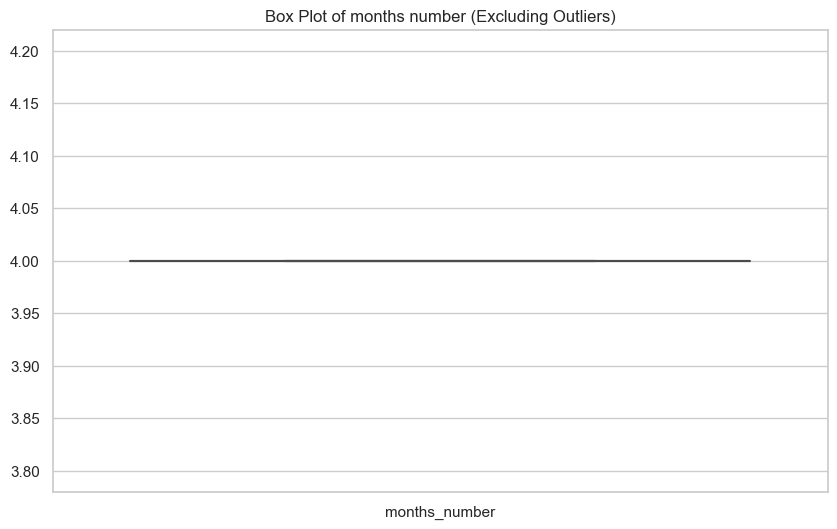

In [102]:
# Calculate the IQR for each column
Q1 = invoice_train[['months_number']].quantile(0.25)
Q3 = invoice_train[['months_number']].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_no_outliers = invoice_train[((invoice_train[['months_number']] >= (Q1 - 1.5 * IQR)) & (invoice_train[['months_number']] <= (Q3 + 1.5 * IQR))).all(axis=1)]

# Plot box plots without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers[['months_number']])
plt.title('Box Plot of months number (Excluding Outliers)')
plt.show()

In [103]:
count_months_4 = (invoice_train['months_number'] == 4).sum()
count_months_not_4 = (invoice_train['months_number'] != 4).sum()
print(f'Rows where months_number is 4: {count_months_4}')
print(f'Rows where months_number is not 4: {count_months_not_4}')


Rows where months_number is 4: 3680478
Rows where months_number is not 4: 796271


In [104]:
random_client_id = invoice_train['client_id'].sample(n=1, random_state=42).iloc[0]

In [106]:
# Filter the DataFrame for the selected client_id
client_invoices = invoice_train[invoice_train['client_id'] == random_client_id]
client_invoices

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,index_difference,consumption_sum
3127427,train_Client_63340,2007-04-04,40,79613,0,5,6,1,325,0,0,0,0,0,6,GAZ,0,325
3127428,train_Client_63340,2013-07-10,11,511455,0,207,8,1,1657,0,0,0,14973,16630,8,ELEC,1657,1657
3127429,train_Client_63340,2007-01-08,40,79613,0,5,6,1,79,0,0,0,325,404,4,GAZ,79,79
3127430,train_Client_63340,2005-11-25,11,511455,0,207,6,1,849,0,0,0,0,849,4,ELEC,849,849
3127431,train_Client_63340,2011-08-06,40,79613,0,5,6,1,129,0,0,0,1704,1833,4,GAZ,129,129
3127432,train_Client_63340,2011-06-10,11,511455,0,207,6,1,875,0,0,0,11180,12055,4,ELEC,875,875
3127433,train_Client_63340,2011-08-06,11,511455,0,207,6,1,615,0,0,0,10565,11180,4,ELEC,615,615
3127434,train_Client_63340,2011-08-02,40,79613,0,5,6,1,155,0,0,0,1549,1704,4,GAZ,155,155
3127435,train_Client_63340,2011-08-02,11,511455,0,207,6,1,695,0,0,0,9870,10565,4,ELEC,695,695
3127436,train_Client_63340,2010-05-10,40,79613,0,5,6,1,102,0,0,0,1447,1549,4,GAZ,102,102


In [116]:
client_counts = invoice_train['client_id'].value_counts()

In [117]:
single_occurrence_ids = client_counts[client_counts == 1].index


In [119]:
single_occurrence_rows = invoice_train[invoice_train['client_id'].isin(single_occurrence_ids)]


In [120]:
num_single_occurrence = single_occurrence_rows.shape[0]
num_multiple_occurrence = invoice_train.shape[0] - num_single_occurrence


In [121]:
print(f'Rows with client_id appearing once: {num_single_occurrence}')
print(f'Rows with client_id appearing more than once: {num_multiple_occurrence}')


Rows with client_id appearing once: 4212
Rows with client_id appearing more than once: 4472537
